## Numpy

In [1]:
import time
import random
import numpy as np
from math import sin, cos
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def timer(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        print(f"Function {func.__name__}\nTime: {time.time() - start}")
        return result
    return wrapper

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [3]:
@timer
def func_list():
    array = [random.random() for _ in range(10000)]
    array = [i + 1 for i in array]

@timer
def func_nump():
    array = np.random.rand(10000)
    array += 1

func_list()
func_nump()

Function func_list
Time: 0.0008511543273925781
Function func_nump
Time: 0.0009920597076416016


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [4]:
l = np.random.rand(10000)

@timer
def sin_cos_list():
    array = [sin(x) + cos(x) for x in l]
    
@timer
def sin_cos_nump():
    array = np.sin(l) + np.cos(l)

sin_cos_list()
sin_cos_nump()

Function sin_cos_list
Time: 0.0010139942169189453
Function sin_cos_nump
Time: 0.0007288455963134766


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [5]:
@timer
def cube_sum1(x):
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

@timer
def cube_sum2(x):
    return np.sum(np.power(x, 3))

@timer
def almost_variance1(x):
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

@timer
def almost_variance2(x):
    m = np.mean(x)
    return np.sum(np.power((x - m), 4)) / len(x)


l = np.random.rand(10000)
cube_sum1(l)
cube_sum2(l)
almost_variance1(l)
almost_variance2(l)

print("Finished!")

Function cube_sum1
Time: 0.0012459754943847656
Function cube_sum2
Time: 0.0002498626708984375
Function almost_variance1
Time: 0.001968860626220703
Function almost_variance2
Time: 0.0004527568817138672
Finished!


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [6]:
np.arange(1, 11) * np.arange(1, 11).reshape(10, 1)

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [7]:
x = np.random.rand(10, 5)
np.sqrt(np.sum(np.power(x - x[:, None], 2), axis=2))

array([[0.        , 0.68632815, 1.11790029, 0.3919986 , 0.78708358,
        0.95279638, 1.12006783, 1.0754947 , 0.92938179, 0.96729293],
       [0.68632815, 0.        , 0.95401956, 0.31069761, 0.87534617,
        1.00205819, 0.96879259, 0.59057169, 0.46086025, 1.0919629 ],
       [1.11790029, 0.95401956, 0.        , 0.92708595, 1.14523678,
        1.30643987, 0.88220949, 1.12697064, 0.70375904, 0.7380672 ],
       [0.3919986 , 0.31069761, 0.92708595, 0.        , 0.72086327,
        0.94839735, 0.91657107, 0.79371576, 0.60032171, 0.96966559],
       [0.78708358, 0.87534617, 1.14523678, 0.72086327, 0.        ,
        1.17673561, 0.56476202, 1.17324991, 0.86037516, 1.11905645],
       [0.95279638, 1.00205819, 1.30643987, 0.94839735, 1.17673561,
        0.        , 1.36774863, 0.7654522 , 0.97978499, 1.16170824],
       [1.12006783, 0.96879259, 0.88220949, 0.91657107, 0.56476202,
        1.36774863, 0.        , 1.20402316, 0.77624671, 1.17758384],
       [1.0754947 , 0.59057169, 1.1269706

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [8]:
x = np.array(([0, 1], [2, 3], [4, 5], [6, 7], [8, 9]))
(x - np.mean(x, axis=0)) / np.std(x, axis=0)

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [9]:
x = (np.array(([1, 2], [3, 4]))).flatten()
a = 3.51

index = np.argmin(np.abs(x - a))
x[index]

4

### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [10]:
def poly(x, a):
    return np.sum(a * np.cumprod([1] + [x] * (len(a) - 1)))

poly(4, [4, 2, 1])

28

## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

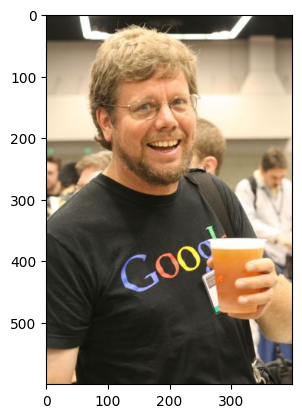

In [11]:
img = mpimg.imread('images/image.jpg')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

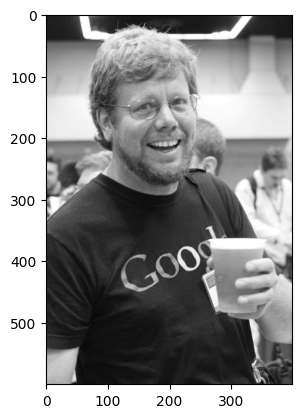

In [12]:
gray_img = np.dot(img[..., :3], [0.2126, 0.7152, 0.0722])
plt.imshow(gray_img, cmap='gray')

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [13]:
import numpy as np

def linear_interpolation(x1, x2, lambdas):
    return lambdas[:, None] * x1 + (1 - lambdas[:, None]) * x2

linear_interpolation(np.array([1, 2, 3]), np.array([4, 5, 6]), np.linspace(0, 1, 11))

array([[4. , 5. , 6. ],
       [3.7, 4.7, 5.7],
       [3.4, 4.4, 5.4],
       [3.1, 4.1, 5.1],
       [2.8, 3.8, 4.8],
       [2.5, 3.5, 4.5],
       [2.2, 3.2, 4.2],
       [1.9, 2.9, 3.9],
       [1.6, 2.6, 3.6],
       [1.3, 2.3, 3.3],
       [1. , 2. , 3. ]])